In [2]:
%matplotlib  inline
import pandas  as pd 
import numpy as np
app_call_record=pd.read_csv("data/call_record_hour.csv",index_col=0,parse_dates=["call_time"])

In [3]:
# app_call_record.drop(['Unnamed: 0'],inplace=True,axis=1)

In [4]:
# app_call_record=app_call_record[:100000]
app_call_record.time.ffill(limit=3,inplace=True)

In [5]:
app_call_record.head(3)

,custorm_id,name,number,call_time,type,time,contact_gap
0,4335793,赖立新,13001011021,2016-11-04 10:17:24,2,22.0,NaN
1,3157627,13001016170,13001016170,2016-11-30 08:08:13,2,0.0,NaN
2,2559110,8613001018225,13001018225,2016-06-30 10:32:02,2,0.0,0.000313


## 特征工程

In [6]:
# time_stats={"total_time":np.sum,"avg_time":np.avg}
app_call_record_group=app_call_record.groupby(["custorm_id","name","number"])
def get_stats(grouped,feature):
    stats=["sum","mean","count","std","max","min","median"]
    prefix=feature+"_"
    grouped=grouped[feature].agg(stats).add_prefix(prefix)
    return grouped
# call_contact_gap=app_call_record_group["contact_gap"].agg(get_stats).add_prefix("contact_gap_")
## 总计
app_call_record_group=app_call_record.groupby(["custorm_id","name","number"])
record_time=get_stats(app_call_record_group,"time")
record_contact_gap=get_stats(app_call_record_group,"contact_gap")

## 来电
app_call_record_group_BA=app_call_record[app_call_record.type==1].groupby(["custorm_id","name","number"])
record_time_BA=get_stats(app_call_record_group_BA,"time").add_suffix('_come')
record_contact_gap_BA=get_stats(app_call_record_group_BA,"contact_gap").add_suffix('_come')

## 去电
app_call_record_group_AB=app_call_record[app_call_record.type==2].groupby(["custorm_id","name","number"])
record_time_AB=get_stats(app_call_record_group_BA,"time").add_suffix('_call_to')
record_contact_gap_AB=get_stats(app_call_record_group_BA,"contact_gap").add_suffix('_call_to')

## 未接
app_call_record_group_miss=app_call_record[app_call_record.type==3].groupby(["custorm_id","name","number"])["type"].count().add_suffix("_miss")


## 合并


In [7]:
contact_info=pd.concat([record_time,record_contact_gap,record_time_AB,record_contact_gap_AB,record_time_BA,record_contact_gap_BA],axis=1)

In [8]:
contact_info.head(3)

time_sum  time_mean  time_count  time_std  \
custorm_id name number                                                   
21         奉三哥  13982597188      33.0       11.0           3       0.0   
           强哥   13982205543      66.0       22.0           3       0.0   
           晗晗   18200290490       NaN        NaN           0       NaN   

                             time_max  time_min  time_median  contact_gap_sum  \
custorm_id name number                                                          
21         奉三哥  13982597188      11.0      11.0         11.0         1.495035   
           强哥   13982205543      22.0      22.0         22.0         0.874387   
           晗晗   18200290490       NaN       NaN          NaN        19.193565   

                             contact_gap_mean  contact_gap_count  \
custorm_id name number                                             
21         奉三哥  13982597188          0.299007                  5   
           强哥   13982205543          0.218597                  4   
           晗晗   18200290490          1.129033                 17   

                                      ...             time_max_come  \
custorm_id name number                ...                             
21         奉三哥  13982597188           ...                      11.0   
           强哥   13982205543           ...                       NaN   
           晗晗   18200290490           ...                       NaN   

                             time_min_come  time_median_come  \
custorm_id name number                                         
21         奉三哥  13982597188           11.0              11.0   
           强哥   13982205543            NaN               NaN   
           晗晗   18200290490            NaN               NaN   

                             contact_gap_sum_come  contact_gap_mean_come  \
custorm_id name number                                                     
21         奉三哥  13982597188              0.745995               0.745995   
           强哥   13982205543                   NaN                    NaN   
           晗晗   18200290490              1.102130               0.220426   

                             contact_gap_count_come  contact_gap_std_come  \
custorm_id name number                                                      
21         奉三哥  13982597188                     1.0                   NaN   
           强哥   13982205543                     NaN                   NaN   
           晗晗   18200290490                     5.0              0.339781   

                             contact_gap_max_come  contact_gap_min_come  \
custorm_id name number                                                    
21         奉三哥  13982597188              0.745995              0.745995   
           强哥   13982205543                   NaN                   NaN   
           晗晗   18200290490              0.781157              0.002176   

                             contact_gap_median_come  
custorm_id name number                                
21         奉三哥  13982597188                 0.745995  
           强哥   13982205543                      NaN  
           晗晗   18200290490                 0.007789  

[3 rows x 42 columns]

## 通话记录分析
- 2439440 个联系对

### 1.数据读取

In [3]:
cust_user_info=pd.read_csv("data/fdl_cust_user_info_chain.csv",index_col=1)
cust_user_info.drop(['Unnamed: 0'],inplace=True,axis=1)
connect_info=pd.read_csv("contact_info.csv",index_col=0)
cust_user_info=cust_user_info.drop_duplicates(subset=["id_no"])


/usr/bin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2.数据概况

In [4]:
cust_user_info.head(3)

,cust_name,id_no,mobi_no,reg_src
id,,,,
5798,戴俊安,371311198712212615,18267179687,Android
20995,肖艳平,430204197010230028,18607337862,Android
25064,申俊鹤,410526199107059570,13253382545,Android


In [5]:
connect_info.head(3)

,name,number,time_sum,time_mean,time_count,time_std,time_max,time_min,time_median,contact_gap_sum,...,time_max_come,time_min_come,time_median_come,contact_gap_sum_come,contact_gap_mean_come,contact_gap_count_come,contact_gap_std_come,contact_gap_max_come,contact_gap_min_come,contact_gap_median_come
custorm_id,,,,,,,,,,,,,,,,,,,,,
21,奉三哥,13982597188,33.0,11.0,3,0.0,11.0,11.0,11.0,1.495035,...,11.0,11.0,11.0,0.745995,0.745995,1.0,NaN,0.745995,0.745995,0.745995
21,强哥,13982205543,66.0,22.0,3,0.0,22.0,22.0,22.0,0.874387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,晗晗,18200290490,NaN,NaN,0,NaN,NaN,NaN,NaN,19.193565,...,NaN,NaN,NaN,1.102130,0.220426,5.0,0.339781,0.781157,0.002176,0.007789


### 3.描述性统计
- 缺失值处理
- 异常值处理


In [6]:
connect_info.ffill(limit=2,inplace=True)
connect_info.fillna(0.0,inplace=True)

#### 异常值处理条件
- connect_info.time_sum>0.0

In [7]:
cond=(connect_info.time_sum>0.0)&(connect_info.time_mean<1800.0) &(connect_info.time_mean>11.5)
connect_info=connect_info[cond]

**A的数量**

In [8]:
connect_info.index.unique().shape

(484715,)

**B的数量**

In [9]:
connect_info.number.unique().shape

(942111,)

### 4.数据合并

In [10]:
unique_id=connect_info.index.unique()
cust_user_info.ix[unique_id,:].head(10)

,cust_name,id_no,mobi_no,reg_src
id,,,,
21,席文娅,510902199303259523,15082532895,Android
69,向坤,433101198908151011,18974340855,Web
102,郝宝雷,371121198712080079,15762351555,Android
105,钟伟,510124197510240011,18681376638,Android
122,黄伟,340104198908261012,18956080650,Web
143,洪子杰,445121199109242033,13421060652,Android
156,代攀攀,513030199212291033,15982108919,Android
163,冯浩,120225198908272535,13022212202,Android
169,杨帆,610331198703261217,18629240052,Android


In [11]:
cust_user_info.index.name="custorm_id"
cust_user_info.rename(columns={"mobi_no":"number"},inplace=True)


In [12]:
user_info=cust_user_info[["id_no","cust_name"]]
join_on_custorm_id=connect_info.join(user_info.add_suffix("_A"))
contact_info=pd.merge(join_on_custorm_id,cust_user_info,on="number",how="inner",left_index=True)

In [13]:
contact_info.head(3)

,name,number,time_sum,time_mean,time_count,time_std,time_max,time_min,time_median,contact_gap_sum,...,contact_gap_count_come,contact_gap_std_come,contact_gap_max_come,contact_gap_min_come,contact_gap_median_come,id_no_A,cust_name_A,cust_name,id_no,reg_src
custorm_id,,,,,,,,,,,,,,,,,,,,,
2627919,强哥,13982205543,66.0,22.0,3,0.0,22.0,22.0,22.0,0.874387,...,1.0,0.000000,0.745995,0.745995,0.745995,510902199303259523,席文娅,唐强,510902198905027856,iOS
1429386,晗晗,18200290490,66.0,22.0,0,0.0,22.0,22.0,22.0,19.193565,...,5.0,0.339781,0.781157,0.002176,0.007789,510902199303259523,席文娅,王芷晗,51090219950831950X,MQQ
1429386,王子涵,18200290490,25.0,25.0,1,0.0,25.0,25.0,25.0,33.172002,...,1.0,3.011260,33.172002,33.172002,33.172002,510902199102048471,李高龙,王芷晗,51090219950831950X,MQQ


In [14]:

## 出生年
contact_info["age_A"]=contact_info.id_no_A.str.slice(6,10).astype("float")
contact_info["age"]=contact_info.id_no.str.slice(6,10).astype("float")
contact_info["age_Gap"]=contact_info.age-contact_info.age_A
##出生月
contact_info["born_month"]=contact_info.id_no.str.slice(10,12).astype("float")
contact_info["born_month_A"]=contact_info.id_no_A.str.slice(10,12).astype("float")
## 性别
contact_info["sex_A"]=contact_info.id_no_A.str.slice(16,17)
contact_info["sex"]=contact_info.id_no.str.slice(16,17)

##省份
contact_info["id_province"]=contact_info.id_no.str.slice(0,2)
contact_info["id_province_A"]=contact_info.id_no_A.str.slice(0,2)
contact_info["same_province"]=contact_info.id_province==contact_info.id_province_A
## 城市
contact_info["id_city"]=contact_info.id_no.str.slice(2,4)
contact_info["id_city_A"]=contact_info.id_no_A.str.slice(2,4)
contact_info["same_city"]=contact_info.id_city==contact_info.id_city_A

In [15]:
def gg(ff):
    return len(str(ff))
dropData=(contact_info.age_A.apply(gg)==6)&(contact_info.age_A<2003)&(contact_info.age<2003)&(contact_info.age>1940)
contact_info=contact_info[dropData]

### 5.数据分析

#### 1.出生年月分布

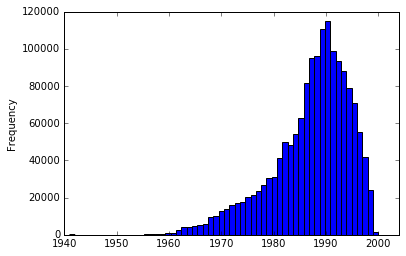

In [16]:
contact_info.age.plot.hist(bins=60,xlim=[1940.0,2004.0])

In [17]:
import matplotlib.pyplot as plt  
import matplotlib as mpl  
mpl.rc('figure', figsize=(8, 6))
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 30.2}
mpl.rc("font",**font)
mpl.rc('lines', lw=2, c='r')

In [18]:
def getPlot(Gap,string,figsize=(60,40),xs= -50,xe=50):
    c = map(lambda x:"%.2f" %x,np.random.rand(49))
    Gap[string].plot.bar(title=string,rot=50,color=c,figsize= figsize,xlim=[xs,xe])

In [19]:
contact_info.columns

Index([u'name', u'number', u'time_sum', u'time_mean', u'time_count',
       u'time_std', u'time_max', u'time_min', u'time_median',
       u'contact_gap_sum', u'contact_gap_mean', u'contact_gap_count',
       u'contact_gap_std', u'contact_gap_max', u'contact_gap_min',
       u'contact_gap_median', u'time_sum_call_to', u'time_mean_call_to',
       u'time_count_call_to', u'time_std_call_to', u'time_max_call_to',
       u'time_min_call_to', u'time_median_call_to', u'contact_gap_sum_call_to',
       u'contact_gap_mean_call_to', u'contact_gap_count_call_to',
       u'contact_gap_std_call_to', u'contact_gap_max_call_to',
       u'contact_gap_min_call_to', u'contact_gap_median_call_to',
       u'time_sum_come', u'time_mean_come', u'time_count_come',
       u'time_std_come', u'time_max_come', u'time_min_come',
       u'time_median_come', u'contact_gap_sum_come', u'contact_gap_mean_come',
       u'contact_gap_count_come', u'contact_gap_std_come',
       u'contact_gap_max_come', u'contact_gap_min

In [20]:
# getPlot(contact_info,"age_Gap")

In [21]:
contact_info.to_csv("data/call_recod_infomation.csv")